<h1><b>Tiền xử lý dữ liệu</b></h1>



***import***

In [164]:
import pandas 
import json 
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import numpy as np


***Hàm xử lý***: xử lý data chuyển dict quote thành list dict riêng

In [74]:
def xuly(quotes):
    value={}
    for i in quotes:
        if(i=='quote'):continue
        value[i]=quotes[i]
    tmp= quotes['quote']
    for j in tmp:
        value[j]=tmp[j]
    return value
def xuly_data(listquotes):
    value=[]
    for i in listquotes:
        value.append(xuly(i))
    return value
        
        

***Hàm get address data***

In [75]:
def get_address_data():
    path_to_year='./data/historical-data'
    list_path_to_year=[path_to_year+'/'+path+'/'+'coin-id-1' for path in os.listdir(path_to_year)]
    list_path=[]
    for i in list_path_to_year:
        for path in os.listdir(i):
            if path.endswith('.json'):
                list_path.append(i+'/'+path)
    return list_path


***Get data***

In [76]:
data_coin_history_by_id=[]
list_path=get_address_data()
for i in list_path:
    data_tmp=json.load(open(i,'r'))
    if(len(data_tmp['quotes'])!=0):data_coin_history_by_id+=(data_tmp['quotes'])


***Hàm xử lý ngày giờ***: hàm chuyển ngày giờ thành giờ hoặc ngày tùy từng thuộc tính của từng cột 

In [77]:
def xyly_ngay_gio_to_gio(object):
    tmp=object.split('T')[1]
    return tmp[0:8]
def xyly_ngay_gio_to_ngay(object):
    tmp=object.split('T')[0]
    return tmp


***Hàm xử lý data fit mô hình***

In [78]:
#xuly_data(data_coin_history_by_id)
data_=pandas.DataFrame(xuly_data(data_coin_history_by_id))
for i in data_.keys():
    data_=data_[data_[i]!=0]

del data_['timeOpen']
del data_['timeClose']
data_['date']=''
data_["timeHigh"] = data_["timeHigh"].apply(xyly_ngay_gio_to_gio)
data_["timeLow"] = data_["timeLow"].apply(xyly_ngay_gio_to_gio)
data_["date"] = data_["timestamp"].apply(xyly_ngay_gio_to_ngay)
del data_['timestamp']
data_.shape

(2927, 9)

# Visualizations

In [79]:
data_.shape

(2927, 9)

In [80]:
data_.columns

Index(['timeHigh', 'timeLow', 'open', 'high', 'low', 'close', 'volume',
       'marketCap', 'date'],
      dtype='object')

In [81]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 243 to 3169
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeHigh   2927 non-null   object 
 1   timeLow    2927 non-null   object 
 2   open       2927 non-null   float64
 3   high       2927 non-null   float64
 4   low        2927 non-null   float64
 5   close      2927 non-null   float64
 6   volume     2927 non-null   float64
 7   marketCap  2927 non-null   float64
 8   date       2927 non-null   object 
dtypes: float64(6), object(3)
memory usage: 228.7+ KB


***Check NAN***

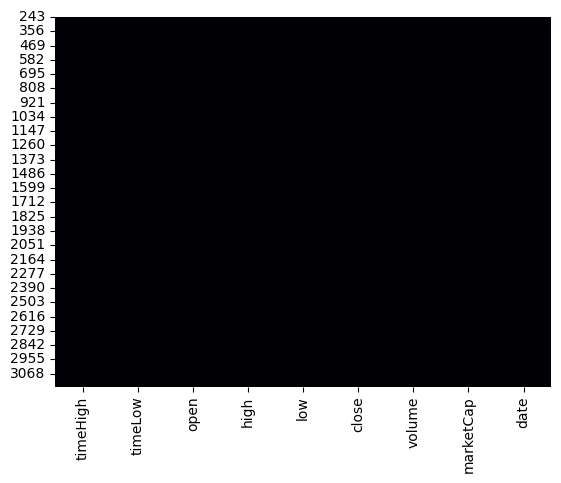

In [82]:
sns.heatmap(data_.isnull(),cmap = 'magma',cbar = False);

In [83]:
data_.head(10)

,timeHigh,timeLow,open,high,low,close,volume,marketCap,date
243,00:51:02,19:11:01,763.280029,777.510010,713.599976,735.070007,46862700.0,8.955395e+09,2013-12-27
244,12:06:01,18:11:01,737.979980,747.059998,705.349976,727.830017,32505800.0,8.869919e+09,2013-12-28
245,21:46:02,04:41:01,728.049988,748.609985,714.440002,745.049988,19011300.0,9.082104e+09,2013-12-29
246,20:46:02,00:51:01,741.349976,766.599976,740.239990,756.130005,20707700.0,9.217168e+09,2013-12-30
247,00:56:02,04:26:02,760.320007,760.580017,738.169983,754.010010,20897300.0,9.191325e+09,2013-12-31
248,23:46:02,00:01:02,754.969971,775.349976,754.969971,771.400024,22489400.0,9.403308e+09,2014-01-01
249,21:31:03,15:01:02,773.440002,820.309998,767.210022,802.390015,38489500.0,9.781074e+09,2014-01-02
250,13:41:02,03:16:01,802.849976,834.150024,789.119995,818.719971,37810100.0,9.980135e+09,2014-01-03
251,23:56:02,04:21:01,823.270020,859.510010,801.669983,859.510010,38005000.0,1.047736e+10,2014-01-04
252,19:26:01,02:06:01,858.549988,952.400024,854.520020,933.530029,72898496.0,1.137966e+10,2014-01-05


In [142]:
def select_month(object):
    return object[5:7]
def select_year(object):
    return object[0:4]

***Tổng khối lượng giao dịch theo từng tháng***

In [155]:
#Trung bình khối lượng theo từng tháng
def TB_Volume_Thang():
    data_by_month = data_[['volume','date']]
    data_by_month['month']=data_by_month['date'].apply(select_month)

    data_by_month['month']=data_by_month['month'].astype(int)
    dict_month={}
    for i in range(1,13):
        tmp=list(data_by_month[data_by_month['month']==i]['volume'])
        dict_month[i]=sum(tmp)/len(tmp)
    return dict_month
#Trung bình khối lượng giao dịch theo từng năm 
def TB_Volume_Nam():
    data_by_year = data_[['volume','date']]
    data_by_year['year']=data_by_year['date'].apply(select_year)

    data_by_year['year']=data_by_year['year'].astype(int)
    dict_year={}
    for i in sorted(Counter(data_by_year['year'])):
        tmp=list(data_by_year[data_by_year['year']==i]['volume'])
        dict_year[i]=sum(tmp)/len(tmp)
    return dict_year




***Vẽ hình***

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6268\3981536661.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_by_month['month']=data_by_month['date'].apply(select_month)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6268\3981536661.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_by_month['month']=data_by_month['month'].astype(int)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6268\3981536661.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

Text(0.5, 1.0, 'Trung bình khối Lượng giao dịch theo từng Năm')

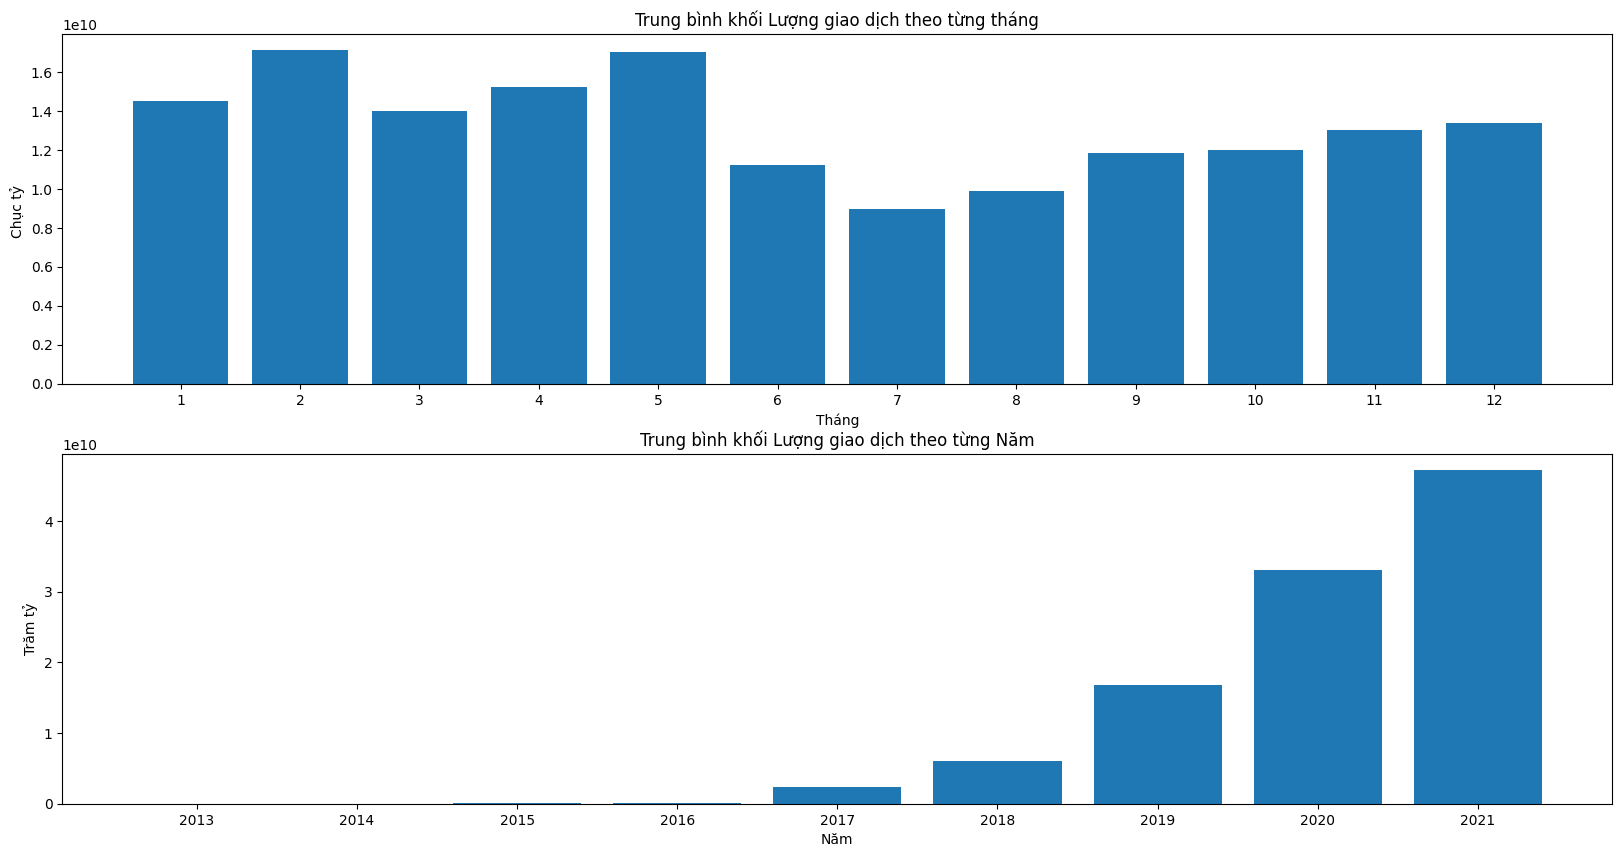

In [178]:
dict_month=TB_Volume_Thang()

plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(2,1,1)
plt.bar([str(i) for i in dict_month.keys()],list(dict_month.values()))
plt.ylabel('Chục tỷ ')
plt.xlabel('Tháng')
plt.title('Trung bình khối Lượng giao dịch theo từng tháng')
dict_year=TB_Volume_Nam()
plt.subplot(2,1,2)
plt.bar([str(i) for i in dict_year.keys()],list(dict_year.values()))
plt.ylabel('Trăm tỷ')
plt.xlabel('Năm')
plt.title('Trung bình khối Lượng giao dịch theo từng Năm')



***Xu hướng giá Bitcoin***


- Lượng chênh lệch giữa giá cao nhất trong từng tháng vào từng năm để biến được sự biến động của tỷ giá bitcoin

In [215]:
# Biến động giá bitcoin trong từng tháng(chỉ xét riêng 2021 vì có sự tăng trưởng cực nhanh trong năm này)
def TB_Cost_BITCOIN_Thang():
    data_by_month = data_[['high','low','date']]
    data_by_month['month']=data_by_month['date'].apply(select_month)
    data_by_month['year']=data_by_month['date'].apply(select_year)
    data_by_month['month']=data_by_month['month'].astype(int)
    data_by_month['year']=data_by_month['year'].astype(int)
    data_by_month=data_by_month[data_by_month['year']==2021]
    dict_month={}
    for i in range(1,13):
        tmp_high=list(data_by_month[data_by_month['month']==i]['high'])
        tmp_low=list(data_by_month[data_by_month['month']==i]['low'])
        dict_month[i]=[max(tmp_high),min(tmp_low),(sum(tmp_low)+sum(tmp_high))/(len(tmp_low)*2)]
    return dict_month
def TB_Cost_BITCOIN_Year():
    data_by_year = data_[['high','low','date']]
    data_by_year['year']=data_by_year['date'].apply(select_year)
    data_by_year['year']=data_by_year['year'].astype(int)
    dict_year={}
    for i in sorted(Counter(data_by_year['year'])):
        tmp_high=list(data_by_year[data_by_year['year']==i]['high'])
        tmp_low=list(data_by_year[data_by_year['year']==i]['low'])
        dict_year[i]=[max(tmp_high),min(tmp_low),(sum(tmp_low)+sum(tmp_high))/(len(tmp_low)*2)]
    return dict_year

***Vẽ hình***

In [216]:
#Gọi hàm lấy data
dict_cost_bitcoin_month=TB_Cost_BITCOIN_Thang()
dict_cost_bitcoin_year=TB_Cost_BITCOIN_Year()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6268\3195815308.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_by_month['month']=data_by_month['date'].apply(select_month)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6268\3195815308.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_by_month['year']=data_by_month['date'].apply(select_year)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6268\3195815308.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

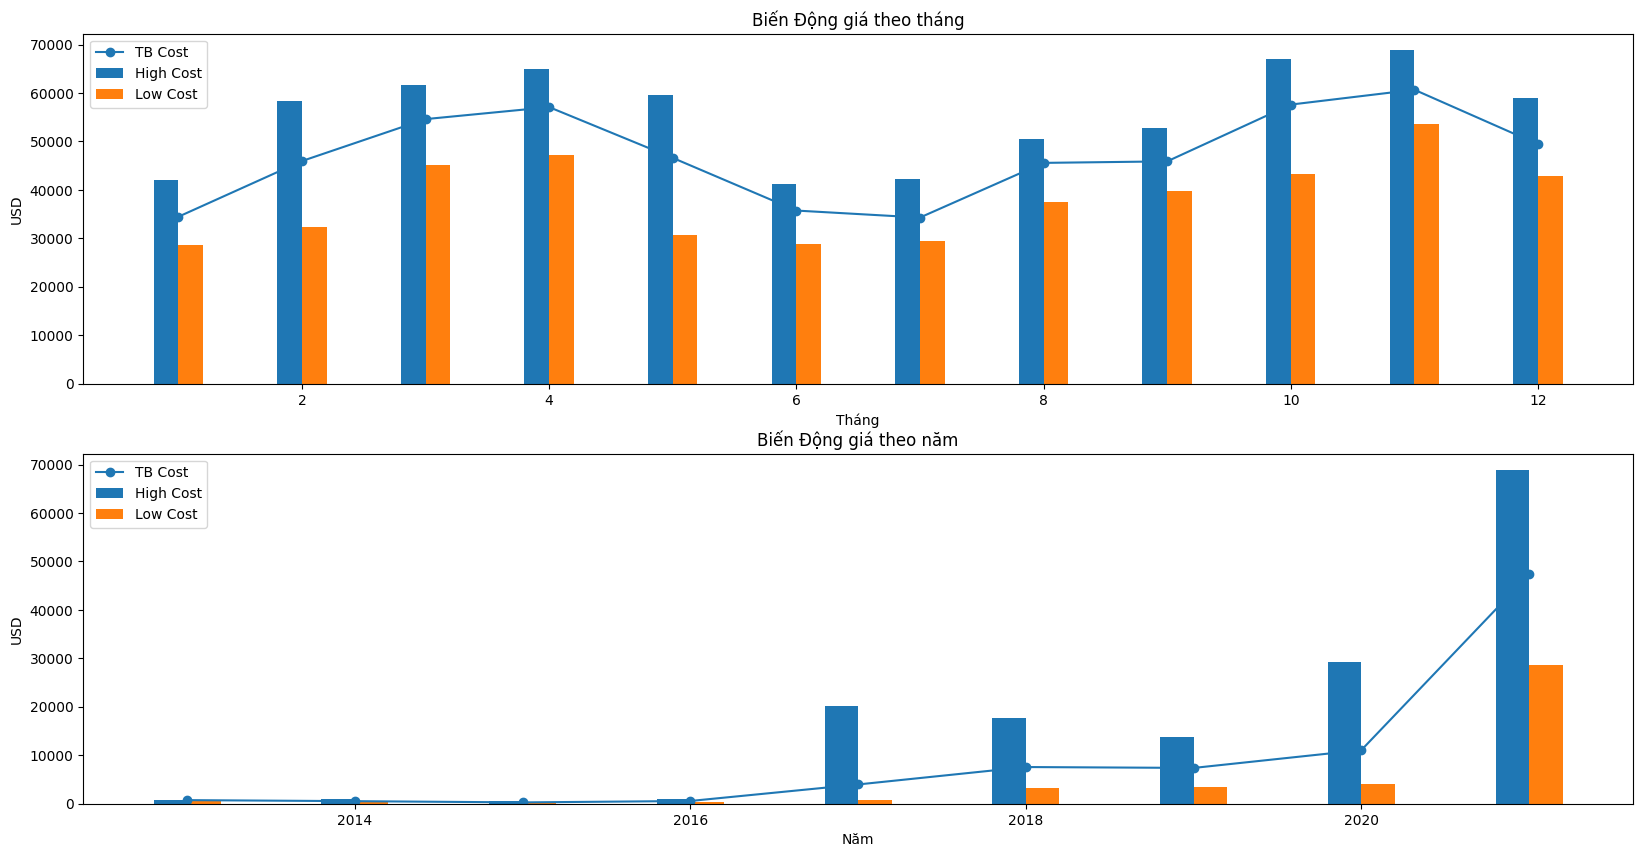

In [218]:
#vẽ hình
[str(i) for i in dict_cost_bitcoin_month.keys()]
plt.rcParams["figure.figsize"] = (20,10)
np.array(list(dict_cost_bitcoin_month.values())).transpose()[0]
plt.subplot(2,1,1)
plt.bar(np.array(list(dict_cost_bitcoin_month.keys()))-float(0.1),np.array(list(dict_cost_bitcoin_month.values())).transpose()[0],width=0.2,label='High Cost')
plt.bar(np.array(list(dict_cost_bitcoin_month.keys()))+float(0.1),np.array(list(dict_cost_bitcoin_month.values())).transpose()[1],width=0.2,label='Low Cost')
plt.plot(np.array(list(dict_cost_bitcoin_month.keys())),np.array(list(dict_cost_bitcoin_month.values())).transpose()[2],label='TB Cost',marker='o')
plt.legend()
plt.title('Biến Động giá theo tháng')
plt.ylabel('USD')
plt.xlabel('Tháng')

plt.subplot(2,1,2)
plt.bar(np.array(list(dict_cost_bitcoin_year.keys()))-float(0.1),np.array(list(dict_cost_bitcoin_year.values())).transpose()[0],width=0.2,label='High Cost')
plt.bar(np.array(list(dict_cost_bitcoin_year.keys()))+float(0.1),np.array(list(dict_cost_bitcoin_year.values())).transpose()[1],width=0.2,label='Low Cost')
plt.plot(np.array(list(dict_cost_bitcoin_year.keys())),np.array(list(dict_cost_bitcoin_year.values())).transpose()[2],label='TB Cost',marker='o')
plt.legend()
plt.ylabel('USD')
plt.xlabel('Năm')
plt.title('Biến Động giá theo năm')
plt.show()



***Quan sát tuần suất thời gian giá lên cao nhất***

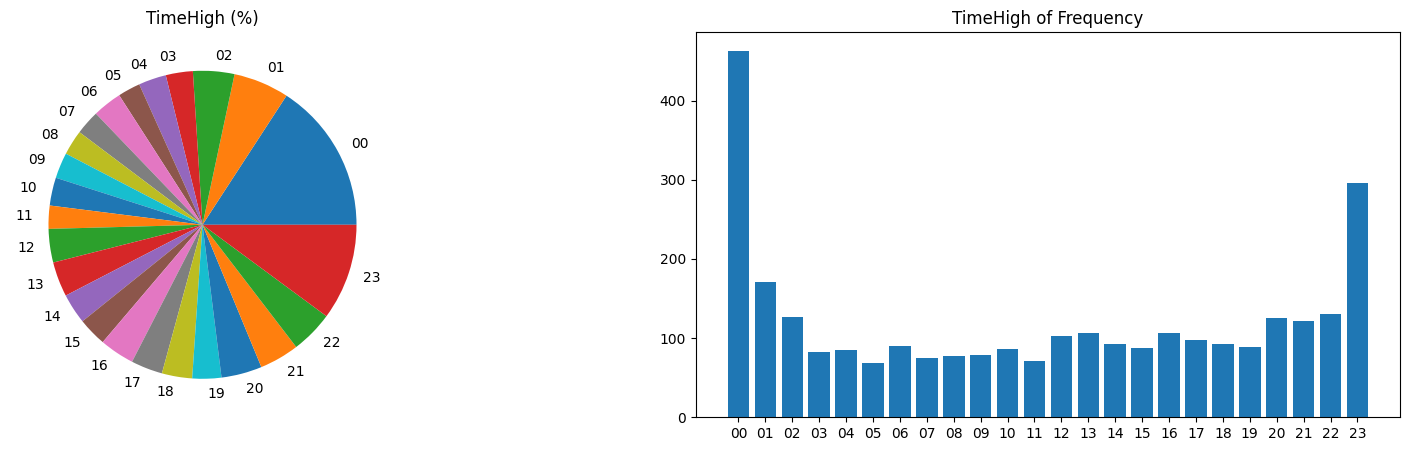

In [84]:
list_time_high=[]# list time theo thời gian và phút
for i in list(data_['timeHigh']):
    list_time_high.append(i[0:2])
l=dict(sorted(Counter(list_time_high).items()))
circle=[]
sum_values_l=sum(l.values())
for i in l.values():
   circle.append(i/sum_values_l)
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels =list(l.keys()))
plt.title('TimeHigh (%)')
plt.subplot(1,2,2)
plt.bar(list(l.keys()),list(l.values()))
plt.title("TimeHigh of Frequency")
plt.show()


***Quan sát tuần suất thời gian giá Thấp nhất***

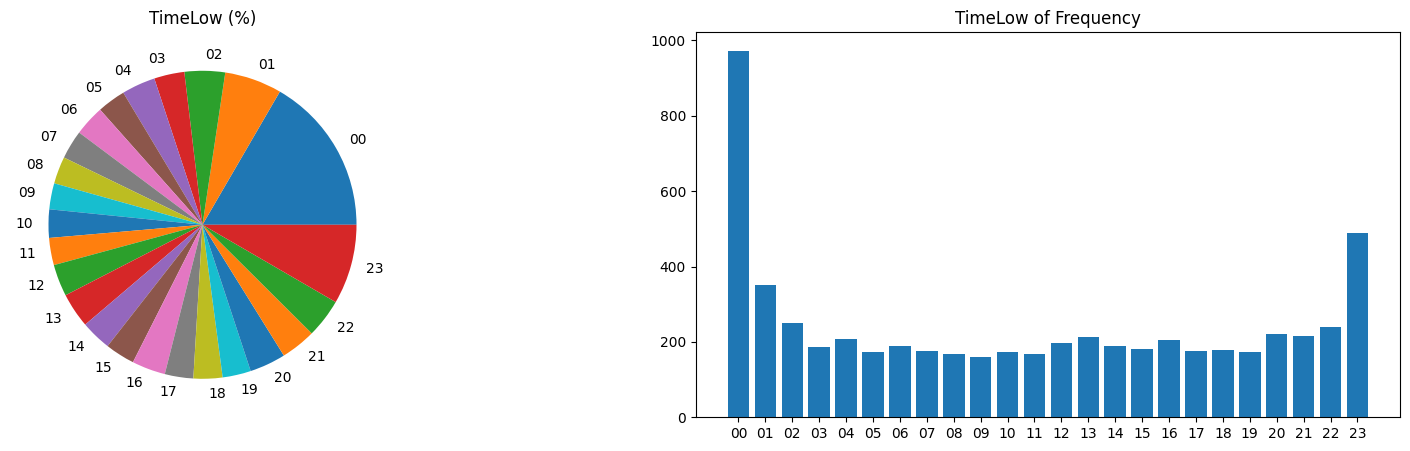

In [85]:
list_time_low=[]# list time theo thời gian và phút
for i in list(data_['timeLow']):
    list_time_high.append(i[0:2])
l=dict(sorted(Counter(list_time_high).items()))
circle=[]
sum_values_l=sum(l.values())
for i in l.values():
   circle.append(i/sum_values_l)
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels =list(l.keys()))
plt.title('TimeLow (%)')
plt.subplot(1,2,2)
plt.bar(list(l.keys()),list(l.values()))
plt.title("TimeLow of Frequency")
plt.show()